In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import kagglehub
import os

os.environ['KAGGLEHUB_CACHE'] = os.path.abspath('.')

path = kagglehub.dataset_download("wardabilal/spotify-global-music-dataset-20092025")
print("Dataset path:", path)

file_path = os.path.join(path, "spotify_data clean.csv")
df = pd.read_csv(file_path)

df.head()

100%|██████████| 1.23M/1.23M [00:00<00:00, 1.50MB/s]

Extracting files...
Dataset path: /Users/uzbtrust/Desktop/spotify-ai-predictions-2030/datasets/wardabilal/spotify-global-music-dataset-20092025/versions/1


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [2]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df = df.dropna(subset=['album_release_date'])

df['year'] = df['album_release_date'].dt.year
df['month'] = df['album_release_date'].dt.month

def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['season'] = df['month'].apply(get_season)

def get_first_genre(genres):
    if isinstance(genres, str):
        return genres.split(',')[0].strip()
    return 'Unknown'

df['genre_clean'] = df['artist_genres'].apply(get_first_genre)

df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,year,month,season,genre_clean
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,2025,10,Autumn,moombahton
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025,10,Autumn,country hip hop
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,2025,10,Autumn,Unknown
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,2025,10,Autumn,moombahton
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,2025,10,Autumn,dark r&b


In [3]:
trend_data = df.groupby(['year', 'season', 'genre_clean'])['track_popularity'].mean().reset_index()

top_genres = trend_data['genre_clean'].value_counts().head(20).index.tolist()
print("Tanlangan top 20 janiy janrlar:", top_genres)

Tanlangan top 20 janiy janrlar: ['Unknown', 'country', 'soundtrack', 'pop', 'rap', 'soft pop', 'edm', 'r&b', 'art pop', 'dark r&b', 'anime', 'nu metal', 'alternative pop', 'classic rock', 'k-pop', 'emo rap', 'medieval', 'east coast hip hop', 'bedroom pop', 'reggaeton']


In [4]:
future_results = []
years = [2026, 2027, 2028, 2029, 2030]
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

for year in years:
    for season in seasons:
        best_genre = "Unknown"
        max_pop = -1
        
        for genre in top_genres:
            subset = trend_data[(trend_data['genre_clean'] == genre) & (trend_data['season'] == season)]
            subset = subset.sort_values('year')
            
            if len(subset) > 5:
                model = LinearRegression()
                X = subset['year'].values.reshape(-1, 1)
                y = subset['track_popularity']
                model.fit(X, y)
                
                prediction = model.predict(np.array([[year]]))[0]
                prediction = np.clip(prediction, 0, 100)
                
                if prediction > max_pop:
                    max_pop = prediction
                    best_genre = genre
        
        if best_genre == "Unknown":
            best_genre = "pop"
            max_pop = 50.0
        
        future_results.append({
            'Yil': year,
            'Fasl': season,
            'Janr': best_genre,
            'Score': round(max_pop, 1)
        })

predict_df = pd.DataFrame(future_results)
predict_df

,Yil,Fasl,Janr,Score
0,2026,Spring,alternative pop,70.8
1,2026,Summer,alternative pop,90.3
2,2026,Autumn,reggaeton,96.5
3,2026,Winter,reggaeton,87.4
4,2027,Spring,alternative pop,70.5
5,2027,Summer,alternative pop,93.3
6,2027,Autumn,reggaeton,100.0
7,2027,Winter,reggaeton,89.9
8,2028,Spring,bedroom pop,70.5
9,2028,Summer,alternative pop,96.4


In [5]:
yearly_top = predict_df.loc[predict_df.groupby('Yil')['Score'].idxmax()]

print("--- 2026-2030 Yillik Bashorat ---")
print(yearly_top[['Yil', 'Janr', 'Score']])

def get_detailed_reason(row):
    reasons = {
        'reggaeton': "Latin musiqa global boom'i, Bad Bunny va Karol G kabi artistlar ta'siri, TikTok viral effekti.",
        'alternative pop': "Indie va muqobil popning o'sishi, Billie Eilish/Arctic Monkeys uslubidagi trendlar.",
        'bedroom pop': "Lo-fi, home production va Gen Z estetikasining ommalashishi (Clairo, Beabadoobee kabi).",
        'pop': "Global mainstream trendlar, viral marketing va superstarlar ta'siri.",
        'latin': "Reggaeton va latin popning crossover muvaffaqiyati.",
        'indie': "Underground va muqobil sahnaning streaming orqali kengayishi.",
        'dance': "EDM va club culture qaytishi.",
        'hip hop': "Street culture va collaborationlar kuchayishi.",
        'rap': "Trap va drill subjanrlarining Reels/TikTok orqali tarqalishi.",
        'trap': "Urban madaniyatining kengayishi va beat-making osonlashishi."
    }
    return reasons.get(row['Janr'].lower(), "Global streaming va viral trendlar ta'siri.")

predict_df['Sabab'] = predict_df.apply(get_detailed_reason, axis=1)

for year in years:
    print(f"\n{'='*55}")
    print(f"🌟 MUSIQA TRENDI: {year}-YIL")
    print(f"{'='*55}")
    
    year_data = predict_df[predict_df['Yil'] == year]
    overall = yearly_top[yearly_top['Yil'] == year]['Janr'].values[0]
    
    print(f"🏆 Yilning mutlaq g'olibi: {overall.upper()}")
    print(f"   Maksimal bashorat balli: {yearly_top[yearly_top['Yil'] == year]['Score'].values[0]}")
    print("-" * 35)
    
    for _, row in year_data.iterrows():
        print(f"📍 {row['Fasl']:8}: {row['Janr']:20} ({row['Score']} ball)")
        print(f" 💡 Sabab: {row['Sabab']}")
    print()

--- 2026-2030 Yillik Bashorat ---
     Yil             Janr  Score
2   2026        reggaeton   96.5
6   2027        reggaeton  100.0
10  2028        reggaeton  100.0
14  2029        reggaeton  100.0
17  2030  alternative pop  100.0

🌟 MUSIQA TRENDI: 2026-YIL
🏆 Yilning mutlaq g'olibi: REGGAETON
   Maksimal bashorat balli: 96.5
-----------------------------------
📍 Spring  : alternative pop      (70.8 ball)
 💡 Sabab: Indie va muqobil popning o'sishi, Billie Eilish/Arctic Monkeys uslubidagi trendlar.
📍 Summer  : alternative pop      (90.3 ball)
 💡 Sabab: Indie va muqobil popning o'sishi, Billie Eilish/Arctic Monkeys uslubidagi trendlar.
📍 Autumn  : reggaeton            (96.5 ball)
 💡 Sabab: Latin musiqa global boom'i, Bad Bunny va Karol G kabi artistlar ta'siri, TikTok viral effekti.
📍 Winter  : reggaeton            (87.4 ball)
 💡 Sabab: Latin musiqa global boom'i, Bad Bunny va Karol G kabi artistlar ta'siri, TikTok viral effekti.


🌟 MUSIQA TRENDI: 2027-YIL
🏆 Yilning mutlaq g'olibi: REGG

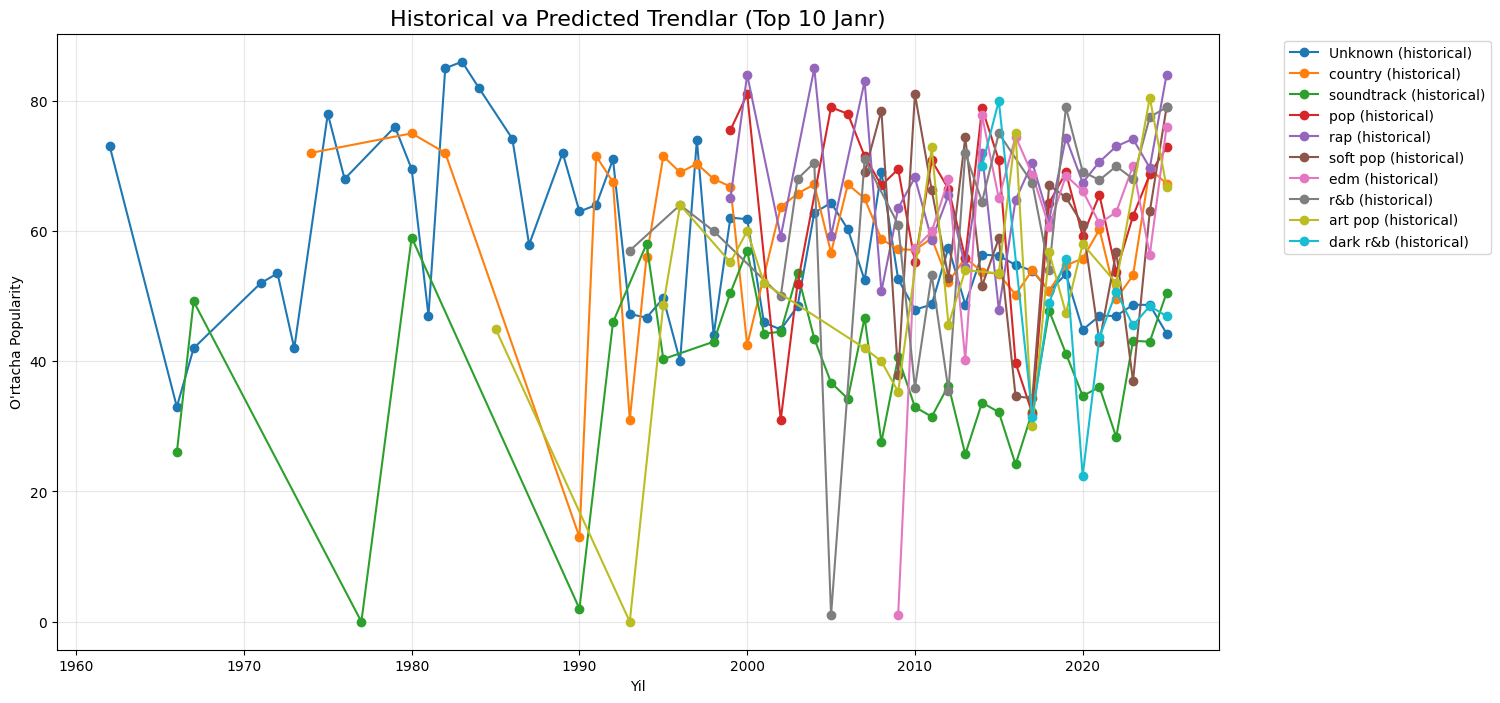

In [6]:
plt.figure(figsize=(15, 8))
selected_genres = top_genres[:10]

for genre in selected_genres:
    hist = trend_data[trend_data['genre_clean'] == genre].groupby('year')['track_popularity'].mean()
    plt.plot(hist.index, hist.values, label=f'{genre} (historical)', marker='o')
    
    pred = predict_df[predict_df['Janr'] == genre]
    if not pred.empty:
        plt.plot(pred['Yil'], pred['Score'], '--', label=f'{genre} (predicted)', marker='x')

plt.title("Historical va Predicted Trendlar (Top 10 Janr)", fontsize=16)
plt.xlabel("Yil")
plt.ylabel("O'rtacha Popularity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

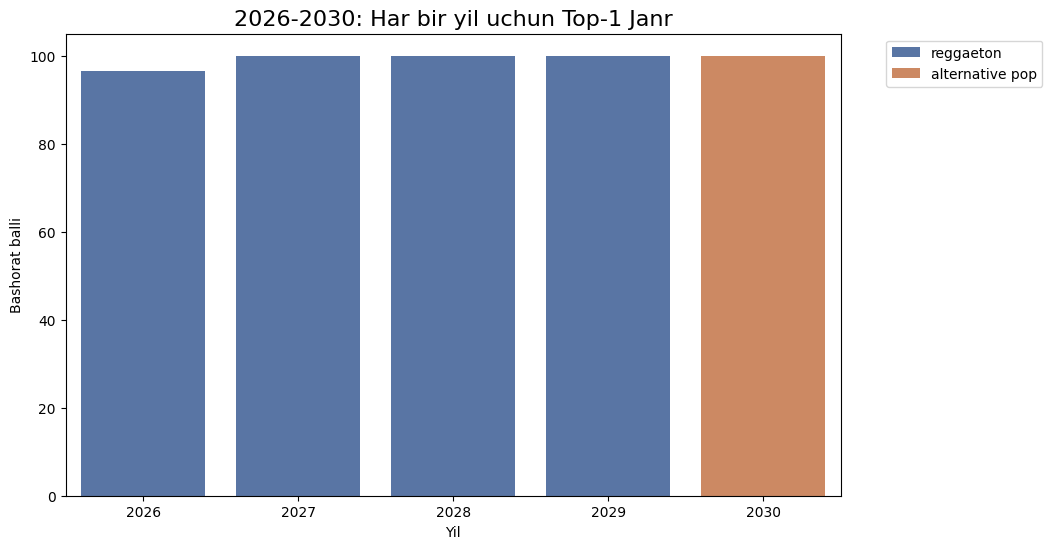

In [7]:
overall_yearly = predict_df.loc[predict_df.groupby('Yil')['Score'].idxmax()].copy()
overall_yearly['Fasl'] = 'YILLIK'

plt.figure(figsize=(10, 6))
sns.barplot(data=overall_yearly, x='Yil', y='Score', hue='Janr', palette='deep')
plt.title("2026-2030: Har bir yil uchun Top-1 Janr", fontsize=16)
plt.ylabel("Bashorat balli")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()